# **Desertification Dataset CSV File Structure**

This data we've collected from Google Earth Engine (GEE) for 5 governorates in Egypt (Dakahlia, Fayoum, Matrouh, New Valley, North Sinai) for identify NDVI for the long. & lat., the Soil properities also Population, and this notebook aims to make a simple and clear EDA on it!

Here are the features included in data and breif information about them:-

| Column      | Description |
|------------|-------------|
| longitude  | Longitude of the sample point |
| latitude   | Latitude of the sample point |
| year       | Year of the observation |
| month      | Month of the observation |
| area       | Region name |
| ndvi       | Normalized Difference Vegetation Index (NDVI) from MODIS, range -1 to 1 |
| t2m_c      | Temperature at 2 meters (°C) |
| td2m_c     | Dewpoint temperature at 2 meters (°C) |
| rh_pct     | Relative humidity (%) |
| tp_m       | Total precipitation (meters) |
| ssrd_jm2   | Surface solar radiation downward (J/m²) |
| LC_Type1   | Land cover type from WorldCover |
| sand       | Soil sand fraction (%) |
| silt       | Soil silt fraction (%) |
| clay       | Soil clay fraction (%) |
| soc        | Soil organic carbon (%) |
| ph         | Soil pH |
| bdod       | Soil bulk density (g/cm³) |
| cec        | Soil cation exchange capacity (cmol/kg) |
| POP        | Population from WorldPop |


# **Import data & necesssary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Grad_Project_Data/des_df.csv'

In [4]:
des_df = pd.read_csv(file_path)

# **Explore Dataset**

In [5]:
# Read a random sample of data
des_df.sample(8)

,longitude,latitude,year,month,area,ndvi,t2m_c,td2m_c,rh_pct,tp_m,ssrd_jm2,LC_Type1,sand,silt,clay,soc,ph,bdod,cec,POP
24216,31.149082,30.646027,2023,1,Dakahlia,0.68920,15.413609,7.136292,57.763374,0.118571,5.555323e+09,50,360,274,367,326,74,129,181,26.733406
95574,31.427560,30.583143,2025,5,Dakahlia,0.37585,24.814917,10.814326,41.361984,0.052801,1.230898e+10,40,331,277,392,365,73,132,193,0.150357
120602,31.131117,29.181772,2024,4,Fayoum,0.58910,24.445423,7.094022,32.894410,0.000926,1.151638e+10,50,510,213,277,275,78,129,189,54.820656
56249,31.023320,30.520262,2024,3,Dakahlia,0.45585,18.343397,7.055341,47.696950,0.058811,9.217537e+09,40,403,290,309,413,71,132,196,2.254456
139216,27.906164,31.041285,2025,2,Matrouh,0.09260,13.120504,5.967271,61.831013,0.037932,5.821424e+09,60,334,360,307,149,79,143,188,3.053097
30716,31.140099,30.870605,2023,2,Dakahlia,0.57245,13.803048,5.282640,56.399780,0.146809,5.625645e+09,10,409,280,311,619,70,128,182,2.731285
7782,34.095560,29.568048,2024,3,NorthSinai,0.13820,15.503958,1.415929,38.459305,0.043088,1.012326e+10,60,260,379,361,44,81,140,142,0.000061
64428,31.265863,30.394497,2024,7,Dakahlia,0.58535,30.619104,18.629534,48.775944,0.001225,1.237998e+10,40,390,254,357,333,74,133,187,3.075502


In [6]:
# Check the num of features and samples on it
des_df.shape

(142351, 20)

In [7]:
# Explore more info about data
des_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142351 entries, 0 to 142350
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  142351 non-null  float64
 1   latitude   142351 non-null  float64
 2   year       142351 non-null  int64  
 3   month      142351 non-null  int64  
 4   area       142351 non-null  object 
 5   ndvi       142351 non-null  float64
 6   t2m_c      142351 non-null  float64
 7   td2m_c     142351 non-null  float64
 8   rh_pct     142351 non-null  float64
 9   tp_m       142351 non-null  float64
 10  ssrd_jm2   142351 non-null  float64
 11  LC_Type1   142351 non-null  int64  
 12  sand       142351 non-null  int64  
 13  silt       142351 non-null  int64  
 14  clay       142351 non-null  int64  
 15  soc        142351 non-null  int64  
 16  ph         142351 non-null  int64  
 17  bdod       142351 non-null  int64  
 18  cec        142351 non-null  int64  
 19  POP        142351 non-n

> Data with 20 features & 142351 samples

> There are no null values

> Most features are numeric, just one feature is categorical: area which represents the governorate

In [8]:
# Explore Statistical Calc. on numeric features
des_df.describe()

,longitude,latitude,year,month,ndvi,t2m_c,td2m_c,rh_pct,tp_m,ssrd_jm2,LC_Type1,sand,silt,clay,soc,ph,bdod,cec,POP
count,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,1.423510e+05,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000,142351.000000
mean,31.245911,30.166283,2023.838898,5.935097,0.425019,22.616421,10.912514,48.616105,0.026036,9.430654e+09,44.931964,420.448378,271.909288,308.279689,300.782341,75.849232,132.734874,181.511243,20.495450
std,0.909991,0.767287,0.766017,3.349740,0.207389,5.789580,4.692472,9.420855,0.037469,2.706100e+09,11.280227,69.275281,40.865101,44.195149,156.092082,3.221124,4.879017,20.274828,46.570652
min,27.501923,23.962560,2023.000000,1.000000,-0.114550,8.935861,-1.891429,13.783543,0.000185,4.704986e+09,10.000000,230.000000,151.000000,182.000000,33.000000,69.000000,118.000000,110.000000,0.000000
25%,31.023320,29.698303,2023.000000,3.000000,0.265450,17.632017,6.914272,42.331654,0.001924,6.468004e+09,40.000000,366.000000,252.000000,272.000000,173.000000,73.000000,130.000000,172.000000,0.416437
50%,31.176031,30.385515,2024.000000,6.000000,0.447450,22.747824,10.512599,49.572155,0.011377,9.737173e+09,40.000000,407.000000,277.000000,302.000000,324.000000,75.000000,131.000000,186.000000,3.785161
75%,31.391628,30.735857,2024.000000,9.000000,0.591175,28.169321,14.885415,55.605880,0.036423,1.214724e+10,50.000000,467.000000,294.000000,347.000000,406.000000,79.000000,134.000000,194.000000,16.232042
max,34.472850,31.292812,2025.000000,12.000000,0.884100,35.899180,22.450647,74.876660,0.486654,1.346892e+10,90.000000,581.000000,425.000000,444.000000,821.000000,82.000000,150.000000,321.000000,561.806100


Geo features: Covers Egypt’s territory

- Longitude: ~27.5 → 34.4,

- Latitude: ~23.9 → 31.2

Time in data:

- Year: 2023 → 2025 (3 years)
- Month: 1 → 12

NDVI (Vegetation Index):

- Range: -0.11 → 0.88
- Mean ~0.42

Climate features:

- Temperature (t2m_c): 8.9 → 35.9°C, Mean ~22.6°C → Matches Egypt’s climate
- Humidity (rh_pct): 13.7 → 74.8%, Mean RH (~48%) is moderate
- Solar Radiation (ssrd_jm2): Mean: ~9.4e9 → High solar radiation, consistent with Egypt’s sunny conditions

Land Cover (LC_Type1):

- Values range 10 → 90 (We will explore them later)

Soil:

- Sand: ~42% on average → Egypt is mostly sandy soil
- SOC (Organic Carbon): ~3g/kg → Nutrient-poor soil
- pH: ~7.5 → Slightly alkaline
- CEC: ~181 meq/kg → Moderate nutrient holding capacity

Population (POP):

- Range: 0 → 561, Mean ~20 → Very skewed; governorates are sparsely populated

In [9]:
# Check duplicates
des_df.duplicated().sum()

np.int64(21675)

In [10]:
# Remove duplicates
des_df = des_df.drop_duplicates()

In [11]:
# Checking that data hasn't duplicates anymore!
total_rows = len(des_df)
duplicate_rows = des_df.duplicated().sum()
unique_rows = len(des_df.drop_duplicates())

duplicate_percentage = (duplicate_rows / total_rows) * 100
unique_percentage = (unique_rows / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {duplicate_rows} ({duplicate_percentage:.2f}%)")
print(f"Unique rows: {unique_rows} ({unique_percentage:.2f}%)")

Total rows: 120676
Duplicate rows: 0 (0.00%)
Unique rows: 120676 (100.00%)


# **Data Visualization**

**1. Geographical Distribution of NDVI**

In [12]:
min_samples = des_df.groupby("area").size().min()

balanced_df = des_df.groupby("area").apply(
    lambda x: x.sample(n=min_samples, random_state=42)
).reset_index(drop=True)
print(balanced_df['area'].value_counts())

# Base map
m = folium.Map(location=[26.8, 30.8], zoom_start=5, tiles="cartodbpositron")

# Adding NDVI heatmap
heat_data = [[row['latitude'], row['longitude'], row['ndvi']] for index, row in balanced_df.iterrows()]
HeatMap(heat_data, radius=8, blur=6, max_zoom=1).add_to(m)

m

area
Dakahlia      217
Fayoum        217
Matrouh       217
NewValley     217
NorthSinai    217
Name: count, dtype: int64


/tmp/ipython-input-1093507863.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = des_df.groupby("area").apply(


> When you zoom to the 5 governates you will see the more the area 'that NDVI samples cover' has green coverage of plants the more green NDVI coloring on map, and the least plant covering more red NDVI coloring on map!  

**2. NDVI over time**

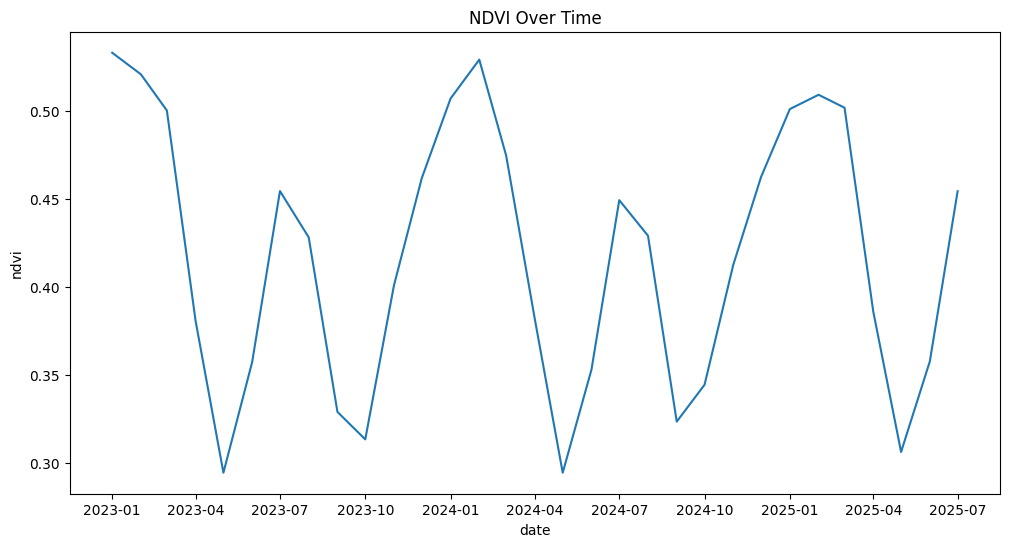

In [13]:
ndvi_trend = des_df.groupby(['year','month'])['ndvi'].mean().reset_index()
ndvi_trend['date'] = pd.to_datetime(ndvi_trend[['year','month']].assign(day=1))

plt.figure(figsize=(12,6))
sns.lineplot(data=ndvi_trend, x='date', y='ndvi')
plt.title("NDVI Over Time")
plt.show()

> NDVI over last 3 years shows Cyclical Pattern: The graph shows a clear, repeating, cyclical pattern. The NDVI values generally rise and fall over a roughly one-year period. This is expected as NDVI is a measure of vegetation health and density, which is heavily influenced by the seasons (growing seasons vs. dormant periods).

> Comparative Peak Values: The peak NDVI value in early 2024 seems to be slightly higher than the one in early 2025 (around 0.52 vs. 0.51). Similarly, the trough in mid-2024 is lower than the trough in mid-2023. This suggests some year-to-year variation in the growing season's intensity or the health of the vegetation.

**3. NDVI and Rainfall**

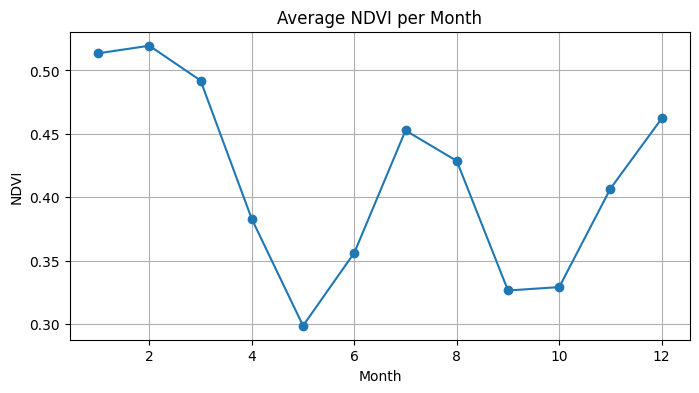

In [14]:
# Average ndvi per month
monthly_avg = des_df.groupby('month')['ndvi'].mean()
plt.figure(figsize=(8,4))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Average NDVI per Month")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.grid(True)
plt.show()

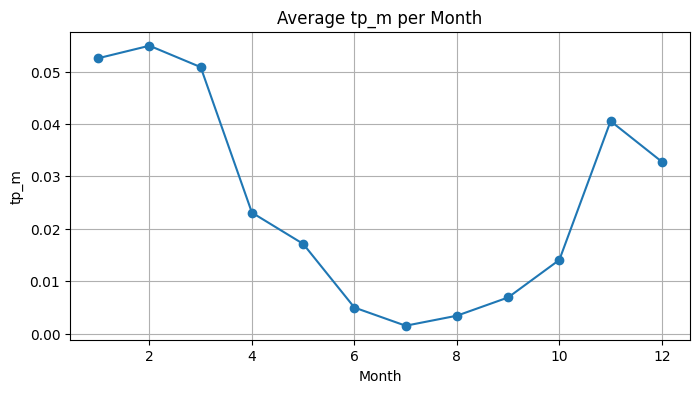

In [15]:
# Average tp_m per month
monthly_avg = des_df.groupby('month')['tp_m'].mean()
plt.figure(figsize=(8,4))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Average tp_m per Month")
plt.xlabel("Month")
plt.ylabel("tp_m")
plt.grid(True)
plt.show()

Correlation between NDVI and Rainfall: 0.68


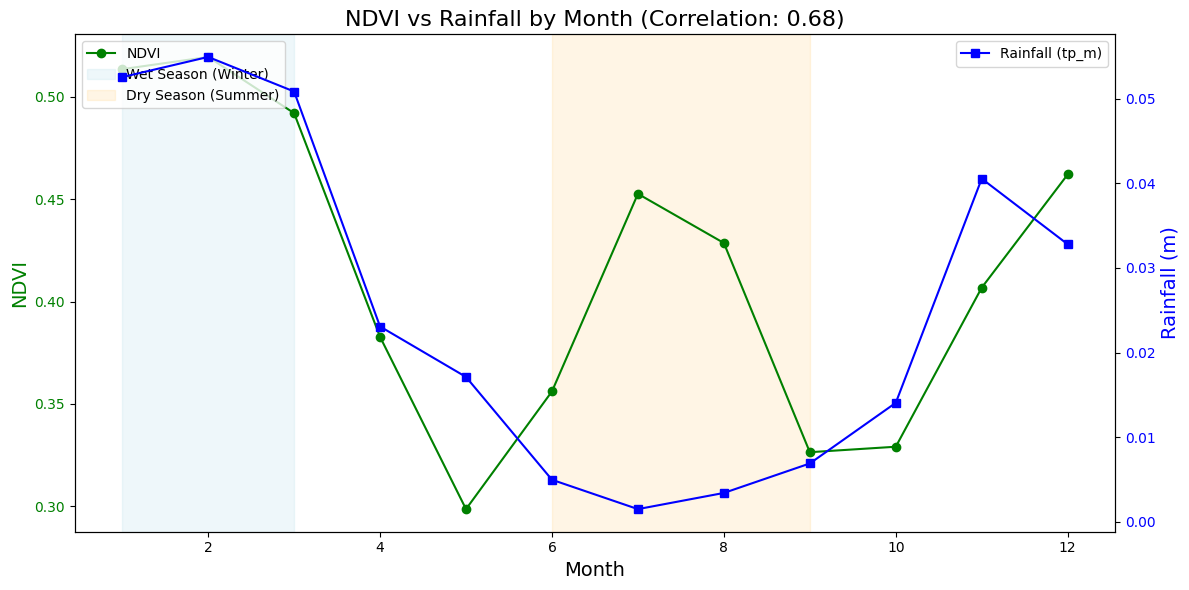

In [16]:
monthly_stats = des_df.groupby('month')[['ndvi', 'tp_m']].mean()

# Calculate correlation
correlation = monthly_stats['ndvi'].corr(monthly_stats['tp_m'])
print(f"Correlation between NDVI and Rainfall: {correlation:.2f}")

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot NDVI
ax1.plot(monthly_stats.index, monthly_stats['ndvi'], color='green', marker='o', label='NDVI')
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('NDVI', color='green', fontsize=14)
ax1.tick_params(axis='y', labelcolor='green')

# Plot rainfall on secondary axis
ax2 = ax1.twinx()
ax2.plot(monthly_stats.index, monthly_stats['tp_m'], color='blue', marker='s', label='Rainfall (tp_m)')
ax2.set_ylabel('Rainfall (m)', color='blue', fontsize=14)
ax2.tick_params(axis='y', labelcolor='blue')

# Shade wet and dry seasons
ax1.axvspan(1, 3, color='lightblue', alpha=0.2, label='Wet Season (Winter)')
ax1.axvspan(6, 9, color='orange', alpha=0.1, label='Dry Season (Summer)')

plt.title(f"NDVI vs Rainfall by Month (Correlation: {correlation:.2f})", fontsize=16)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

> Positive Correlation between NDVI and Rainfall: There is a moderate positive correlation of around 0.6 between NDVI and rainfall. This suggests that as rainfall increases, the Normalized Difference Vegetation Index (NDVI) also tends to increase, and vice versa. This is expected, as more rainfall typically leads to healthier and denser vegetation. Peaks in Jan–Mar and Nov–Dec when rainfall is highest, dips in dry months (Jun–Sep) that confirms seasonality of vegetation growth in Egypt.

**4. Population vs NDVI**

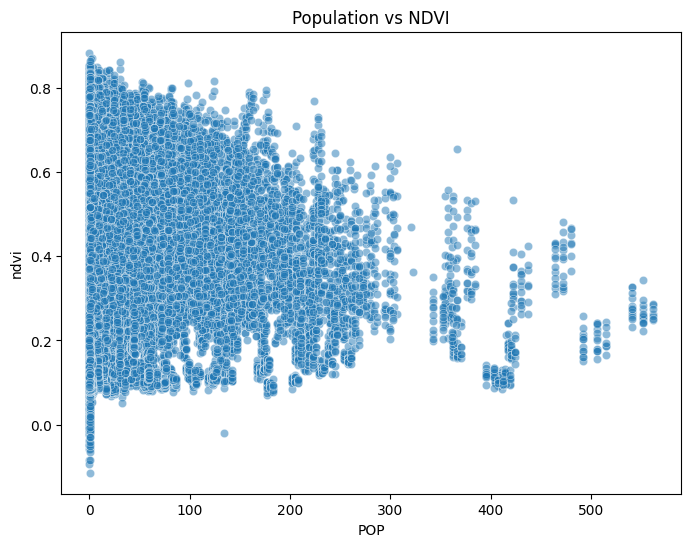

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=des_df, x='POP', y='ndvi', alpha=0.5)
plt.title("Population vs NDVI")
plt.show()

> As the population density (POP) increases, the NDVI values tend to be lower. This is likely because higher population density leads to more urban development, such as buildings and roads, which replace natural vegetation, resulting in lower NDVI scores.

**5. Land Cover Distribution (LC_Type1)**

In [18]:
# Map MODIS classes (LC_Type1) to names
lc_map = {
    10: "Cropland",
    20: "Cropland/Natural Veg Mosaic",
    30: "Grassland",
    40: "Shrubland",
    50: "Savanna",
    60: "Forest",
    70: "Urban",
    80: "Wetlands",
    90: "Barren/Desert",
}

In [19]:
# Count frequencies
lc_counts = des_df["LC_Type1"].value_counts().reset_index()
lc_counts.columns = ["LC_Type1", "count"]
lc_counts["Land_Cover"] = lc_counts["LC_Type1"].map(lc_map)

/tmp/ipython-input-1399621323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lc_counts, x="Land_Cover", y="count", palette="viridis")


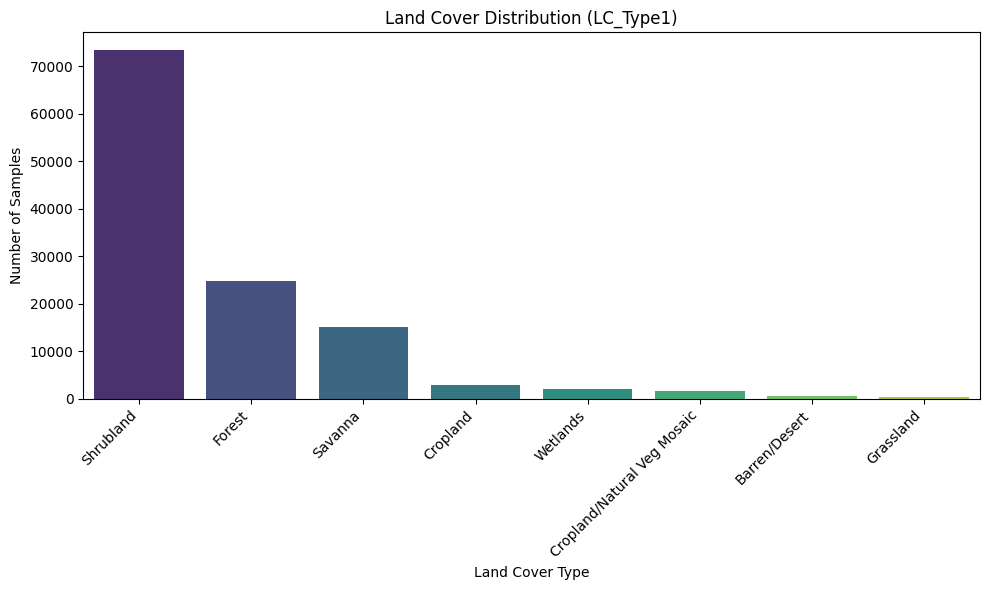

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=lc_counts, x="Land_Cover", y="count", palette="viridis")
plt.title("Land Cover Distribution (LC_Type1)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Land Cover Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

> Land Cover Types is highly imbalanced, with Shrubland, Forest, and Savanna making up the vast majority of the dataset.

**6. Data Distribution by Governorate**

/tmp/ipython-input-2005703845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_counts, x='Governorate', y='Samples', palette='Set3')


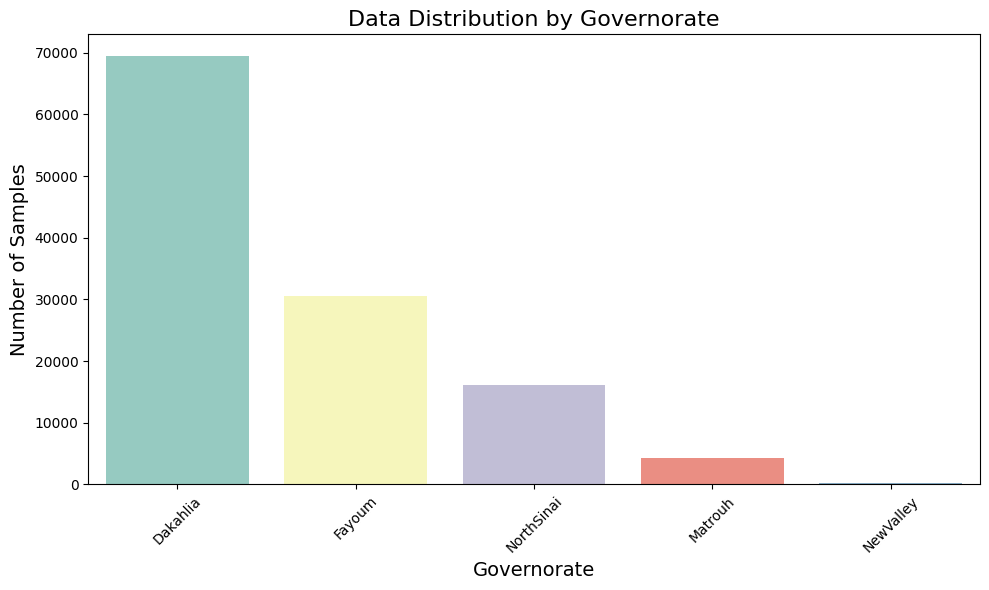

In [21]:
area_counts = des_df['area'].value_counts().reset_index()
area_counts.columns = ['Governorate', 'Samples']

plt.figure(figsize=(10,6))
sns.barplot(data=area_counts, x='Governorate', y='Samples', palette='Set3')

plt.title("Data Distribution by Governorate", fontsize=16)
plt.xlabel("Governorate", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Majority of the data samples is concentrated in Dakahlia and Fayoum

**7. NDVI Distribution per Governorate**

/tmp/ipython-input-2408835594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=des_df, x='area', y='ndvi', palette='YlGn', inner=None, alpha=0.6)


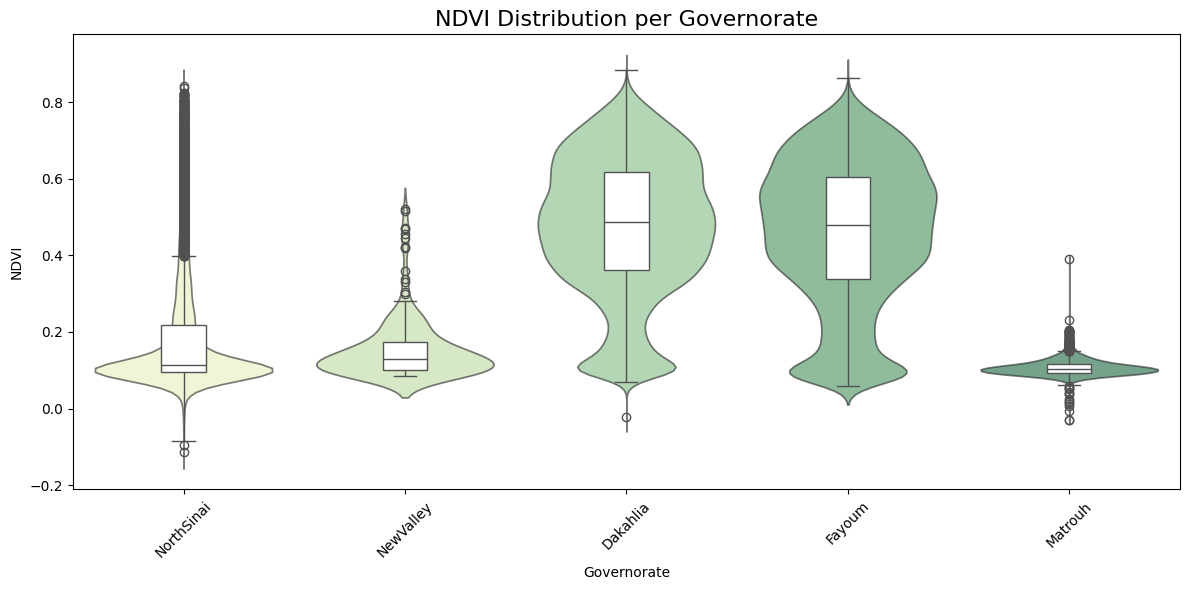

In [22]:
plt.figure(figsize=(12,6))

sns.violinplot(data=des_df, x='area', y='ndvi', palette='YlGn', inner=None, alpha=0.6)

sns.boxplot(data=des_df, x='area', y='ndvi', width=0.2, showcaps=True, boxprops={'facecolor':'white', "zorder":2})

plt.xticks(rotation=45)
plt.title("NDVI Distribution per Governorate", fontsize=16)
plt.xlabel("Governorate")
plt.ylabel("NDVI")
plt.tight_layout()
plt.show()

> The agricultural regions of the Nile Delta (Dakahilia, Fayoum) have high, dense NDVI values, while the desert regions (North Sinai, New Valley, Matrouh) have low, concentrated values, with some minor exceptions that areas may be possibly oases or small agricultural plots.

**8. Data Distribution by Year**

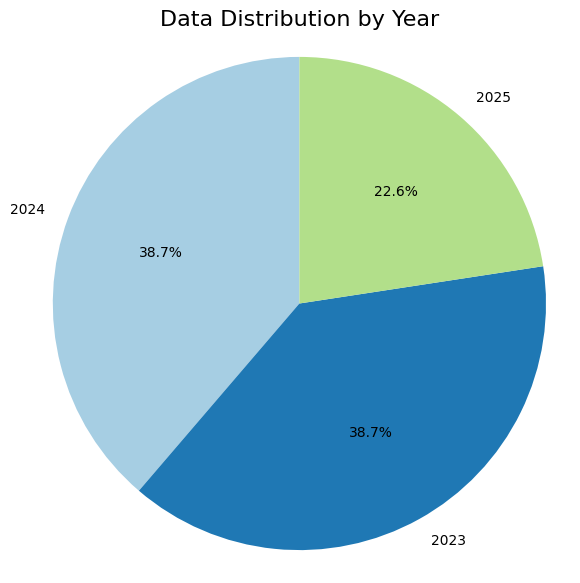

In [23]:
year_counts = des_df['year'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title("Data Distribution by Year", fontsize=16)
plt.axis('equal')
plt.show()

In [24]:
data_2025 = des_df[des_df['year'] == 2025]

unique_months_2025 = sorted(data_2025['month'].unique())
num_months_2025 = len(unique_months_2025)

print(f"Number of unique months in 2025 data: {num_months_2025}")
print(f"Months in 2025 data: {unique_months_2025}")

Number of unique months in 2025 data: 7
Months in 2025 data: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


> 2023 & 2024 has equal samples in data, while 2025 less than them because data in 2025 updated to July